Temperature Scores (°C): [15 17 16 14 18 20 19 15 21 22]
Mean: 17.70, Std Dev: 2.61
Scaled Temperatures (Standardized): [-1.03464225 -0.26824058 -0.65144142 -1.41784308  0.11496025  0.88136192
  0.49816108 -1.03464225  1.26456275  1.64776358]
Test decision (h): 0
p-value: 0.9550
KS statistic: 0.1496


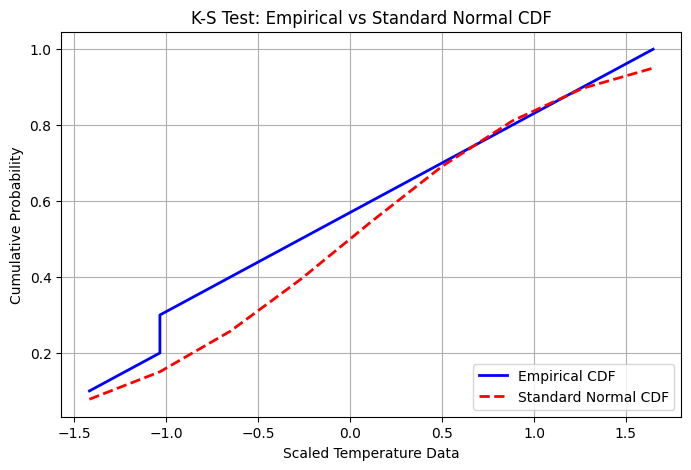

In [1]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

temperature_data = np.array([15, 17, 16, 14, 18, 20, 19, 15, 21, 22])

print("Temperature Scores (°C):", temperature_data)

mean_temp = np.mean(temperature_data)
std_temp = np.std(temperature_data)
scaled_temps = (temperature_data - mean_temp) / std_temp
print(f"Mean: {mean_temp:.2f}, Std Dev: {std_temp:.2f}")
print("Scaled Temperatures (Standardized):", scaled_temps)

ks_result = kstest(scaled_temps, 'norm')

print(f"Test decision (h): {int(ks_result.pvalue < 0.05)}")
print(f"p-value: {ks_result.pvalue:.4f}")
print(f"KS statistic: {ks_result.statistic:.4f}")

sorted_scaled = np.sort(scaled_temps)
ecdf_y = np.arange(1, len(sorted_scaled)+1) / len(sorted_scaled)
normal_cdf = norm.cdf(sorted_scaled)

plt.figure(figsize=(8, 5))
plt.plot(sorted_scaled, ecdf_y, label='Empirical CDF', color='blue', linewidth=2)
plt.plot(sorted_scaled, normal_cdf, label='Standard Normal CDF', color='red', linestyle='--', linewidth=2)
plt.title("K-S Test: Empirical vs Standard Normal CDF")
plt.xlabel("Scaled Temperature Data")
plt.ylabel("Cumulative Probability")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
